In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the file
cards = pd.read_csv('creditcard.csv')

In [3]:
cards.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cards.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
#Checking the entire data frame for missing values
cards.isna().any().any()

False

In [6]:
#Creating a correlation dataframe 
cc = cards.corr() 

#Identifying the correlation of the other variables to Class
cc["Class"].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

In [7]:
#Creating a dataframe with all the fraud transactions
fraud_cards = cards[cards['Class']==1]

fraud_cards['Amount'].describe().round(2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

Text(0.5, 0, 'Amount ($)')

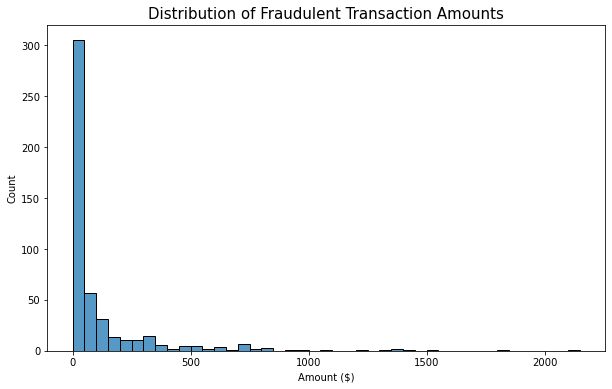

In [8]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x=fraud_cards['Amount'], binwidth=50)
plt.title("Distribution of Fraudulent Transaction Amounts", fontsize=15)
ax.set_xlabel("Amount ($)")

Text(0.5, 1.0, 'Transaction Time vs. Amount')

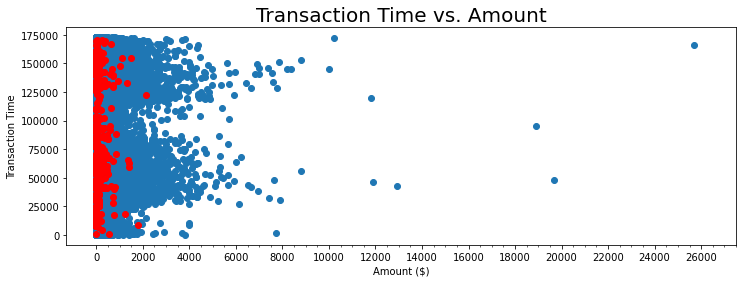

In [9]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y='Time',x='Amount', data=cards)
ax.scatter(y='Time',x='Amount', data=fraud_cards,facecolor="red")
major_xticks = np.arange(0, 28000, 2000)
minor_xticks = np.arange(0, 28000, 500)
ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor = True)
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Transaction Time")
ax.set_title('Transaction Time vs. Amount',fontsize=20)

In [10]:
#Calculating the number of frauds/legitimate transactions in the dataset
cards['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
#Calculating the percentage of frauds/legitimate transactions in the dataset
round((cards['Class'].value_counts()/len(cards))*100,2)

0    99.83
1     0.17
Name: Class, dtype: float64

In [12]:
#Creating a new balanced datset with 250 fraudulent transactions
cards_bal = cards[cards['Class']==1].sample(n=250)

#Adding 250 legitimate transactions
cards_bal = cards_bal.append(cards[cards['Class']==0].sample(n=250))

In [13]:
#Calculating the percentage of frauds/legitimate transactions in the dataset
round((cards_bal['Class'].value_counts()/len(cards_bal))*100,2)

1    50.0
0    50.0
Name: Class, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

X = cards_bal.drop('Class',axis=1)
y = cards_bal['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [15]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
DecisionTreeClassifier()


DecisionTreeClassifier()

In [17]:
decision_trees_predictions = dtree.predict(X_test)


In [18]:
#Create an instance of the RandomForestClassifier class and fit it to our training data
from sklearn.ensemble import RandomForestClassifier

#n_estimators is the number of trees in the forest
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
random_forests_predictions = rfc.predict(X_test)


In [20]:
#Import KNeighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

#K represents the Number of neighbors to use for kneighbors queries, we will loop over a range of values to determine which K value is best suited for this model
#Creating an empty dataframe to store the values
error_rate_df = pd.DataFrame(columns=['K', 'Error Rate'])

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate=np.mean(pred_i != y_test)   
    df = {'K':i, 'Error Rate':error_rate}
    error_rate_df = error_rate_df.append(df, ignore_index = True)

Text(0, 0.5, 'Error Rate')

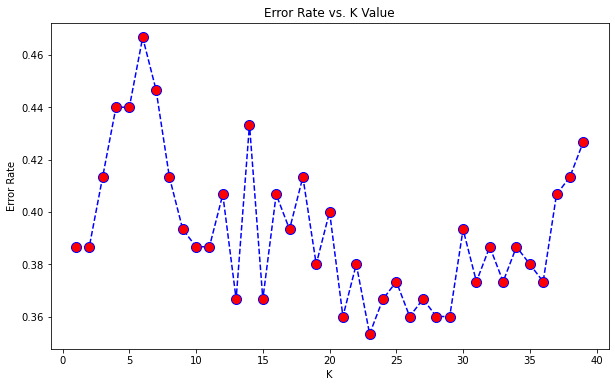

In [21]:
plt.figure(figsize=(10,6))
plt.plot(error_rate_df['K'],error_rate_df['Error Rate'],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
k = error_rate_df[error_rate_df['Error Rate'] == min(error_rate_df['Error Rate'])]['K']

#It is possible there may be multiple k values
if len(k)>1:
    #In case there are multiple k values we resent the index and select the first k value
    k = k.reset_index()
    k = int(k["K"][0])
else:
    k = int(k)

print("The error rate appears to be the lowest when k =", k,"Let's train the model with this k value.")

The error rate appears to be the lowest when k = 23 Let's train the model with this k value.


In [23]:
#Create an instance of the KNN classifier and fit it to our training data
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [24]:
knn_predictions = knn.predict(X_test)


In [25]:
#Importing K Means classifier
from sklearn.cluster import KMeans

#Create an instance of the K Means classifier and fit it to our training data
#We only have two target values 1 and 0 so we set the number of clusters to 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train,y_train)

KMeans(n_clusters=2)

In [26]:
kmeans_predictions = kmeans.fit_predict(X_test)


In [27]:
#Import Classification Report and Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix

#Converting each of the classification reports into dictionaries
report_dt = classification_report(y_test,decision_trees_predictions , output_dict=True)
report_rf = classification_report(y_test,random_forests_predictions , output_dict=True)
report_knn = classification_report(y_test,knn_predictions, output_dict=True)
report_kmeans = classification_report(y_test,kmeans_predictions, output_dict=True)

In [28]:
model = {'Model Name':['Decision Trees', 'Random Forests','KNN','K-Means'],
        'Accuracy':[report_dt['accuracy'], report_rf['accuracy'], report_knn['accuracy'], report_kmeans['accuracy']],
        'Precision':[report_dt['weighted avg']['precision'],report_rf['weighted avg']['precision'], report_knn['weighted avg']['precision'], report_kmeans['weighted avg']['precision']],
        'Recall':[report_dt['weighted avg']['recall'],report_rf['weighted avg']['recall'],report_knn['weighted avg']['recall'],report_kmeans['weighted avg']['recall']],
        'F1-Score':[report_dt['weighted avg']['f1-score'],report_rf['weighted avg']['f1-score'],report_knn['weighted avg']['f1-score'],report_kmeans['weighted avg']['f1-score']]}

model = pd.DataFrame(model)

model.round(2).sort_values(by=['Accuracy','Precision','Recall','F1-Score'],ascending=False)

,Model Name,Accuracy,Precision,Recall,F1-Score
1,Random Forests,0.94,0.94,0.94,0.94
0,Decision Trees,0.89,0.89,0.89,0.89
2,KNN,0.65,0.65,0.65,0.65
3,K-Means,0.51,0.51,0.51,0.51


In [29]:
X = cards.drop('Class',axis=1)
y = cards['Class']

#Random Forests predictions
random_forests_predictions = rfc.predict(X)

#Assigning the classification report to a dictionary to call later
cards_cr = classification_report(y,random_forests_predictions, output_dict=True)

print(classification_report(y,random_forests_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.06      0.93      0.11       492

    accuracy                           0.98    284807
   macro avg       0.53      0.95      0.55    284807
weighted avg       1.00      0.98      0.99    284807



In [30]:
cards_accuracy = round(cards_cr['accuracy'],2)

print('The Random Forests Model has an accuracy of',cards_accuracy)

The Random Forests Model has an accuracy of 0.98
